In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [5]:
file = './MNIST'
mnist = input_data.read_data_sets(file, one_hot=True)

Extracting ./MNIST/train-images-idx3-ubyte.gz
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz


0.77
[False]
[[1.4651174e-04 4.0923592e-08 7.2678340e-05 1.7344962e-09 6.3202751e-04
  2.4433847e-04 9.9885762e-01 3.6277927e-09 4.5069544e-05 1.7122881e-06]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


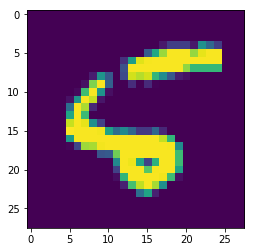

In [34]:
#模型输入
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

mul = tf.matmul(x, W)+b
y = tf.nn.softmax(mul)
loss = -tf.reduce_sum(y_*tf.log(y))
optimal = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
correct_pre = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#创建session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(optimal, feed_dict={x:batch_xs, y_:batch_ys})
        if _%1000==0:
            acc = tf.reduce_mean(tf.cast(correct_pre, tf.float32))
            print sess.run(acc,feed_dict={x:batch_xs, y_:batch_ys})
    for i in range(len(mnist.test.images)):
        res = sess.run(correct_pre, feed_dict={x:np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])})
        if not res:
            print res
            print sess.run(y, feed_dict={x: np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])})
            print sess.run(y_,feed_dict={x: np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])})
            one_pic_arr = np.reshape(mnist.test.images[i],(28, 28))
            pic_matrix = np.matrix(one_pic_arr, dtype="float")
            plt.imshow(pic_matrix)
            pylab.show()
            break
            

In [20]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(mnist.test.images)):
        res = sess.rn(correct_pre, feed_dict={x:np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])})
        if not res:
            print('预测的值是：',sess.run(y, feed_dict={x: np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])}))
            print('实际的值是：',sess.run(y_,feed_dict={x: np.array([mnist.test.images[i]]), y_: np.array([mnist.test.labels[i]])}))

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0.,

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0.,

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0.,

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0.,

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.

('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32))
('\xe5\xae\x9e\xe9\x99\x85\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))
('\xe9\xa2\x84\xe6\xb5\x8b\xe7\x9a\x84\xe5\x80\xbc\xe6\x98\xaf\xef\xbc\x9a', array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.